In [2]:
import pandas as pd

In [3]:
df=pd.read_excel("Proj1DataSet.xlsx")

In [4]:
df.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [5]:
feature_names=df.columns
class_names=df.species.unique()

pj={}

for c in class_names:
    x=df.loc[df['species'] == c].shape[0]
    pj[c]=(x/df.shape[0])


In [6]:
# class separation
classes={}
for specie in df.species.unique():
        classes[specie]=df.loc[df.species == specie]

In [7]:
# within class variance
# variance of i-th feature in class j
sw=[0]* (len(feature_names)-1)
for i in range(len(feature_names)-1):
    for j in class_names:
        # separate classes
        class_df=df.loc[df.species == j]

        # feature variance in class c
        ro_ji=class_df[feature_names[i]].var()
        
        # sum ro for feature i in all classes
        sw[i]+=pj[j]*ro_ji    

In [8]:
# between class variance
sb=[0]* (len(feature_names)-1)
for i in range(len(feature_names)-1):
    for j in class_names:
        # separate classes
        class_df=df.loc[df.species == j]

        # feature variance in class c
        u_ji=class_df[feature_names[i]].mean()
        
        # sum ro for feature i in all classes
        sb[i]+=(pj[j]* (u_ji - df[feature_names[i]].mean()) )**2  

In [9]:
print("Sepal Length min=",df.meas_1.min())
print("Sepal Length max=",df.meas_1.max())
print("Sepal Length mean=",df.meas_1.mean())
print("Sepal Length variance=",df.meas_1.var())
print("Sepal Length within class variance=",sw[0])
print("Sepal Length between class variance=",sb[0])


Sepal Length min= 4.3
Sepal Length max= 7.9
Sepal Length mean= 5.843333333333334
Sepal Length variance= 0.6856935123042507
Sepal Length within class variance= 0.2650081632653062
Sepal Length between class variance= 0.14047140740740707


In [10]:
print("Sepal Width min=",df.meas_2.min())
print("Sepal Width max=",df.meas_2.max())
print("Sepal Width mean=",df.meas_2.mean())
print("Sepal Width variance=",df.meas_2.var())
print("Sepal width within class variance=",sw[1])
print("Sepal width between class variance=",sb[1])


Sepal Width min= 2.0
Sepal Width max= 4.4
Sepal Width mean= 3.0573333333333337
Sepal Width variance= 0.189979418344519
Sepal width within class variance= 0.11538775510204083
Sepal width between class variance= 0.025210962962962925


In [11]:
print("Petal Length min=",df.meas_3.min())
print("Petal Length max=",df.meas_3.max())
print("Petal Length mean=",df.meas_3.mean())
print("Petal Length variance=",df.meas_3.var())
print("Petal Length within class variance=",sw[2])
print("Petal Length between class variance=",sb[2])


Petal Length min= 1.0
Petal Length max= 6.9
Petal Length mean= 3.7580000000000005
Petal Length variance= 3.116277852348993
Petal Length within class variance= 0.18518775510204083
Petal Length between class variance= 0.9713395555555555


In [12]:
print("Petal Width min=",df.meas_4.min())
print("Petal Width max=",df.meas_4.max())
print("Petal Width mean=",df.meas_4.mean())
print("Petal Width variance=",df.meas_4.var())
print("Petal Width within class variance=",sw[3])
print("Petal Width between class variance=",sb[3])


Petal Width min= 0.1
Petal Width max= 2.5
Petal Width mean= 1.1993333333333336
Petal Width variance= 0.5810062639821029
Petal Width within class variance= 0.04188163265306122
Petal Width between class variance= 0.17869629629629633


In [13]:
df=df.assign(classs=df.species.replace({'setosa':1,'versicolor':2,'virginica':3}))
df.drop(columns='species',inplace=True)

C:\Users\Tyreek ALEXANDER\AppData\Local\Temp\ipykernel_4756\1992577015.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.assign(classs=df.species.replace({'setosa':1,'versicolor':2,'virginica':3}))


In [14]:
(df
 .corr(method='spearman')
 .style
 .background_gradient(cmap='RdBu_r')
 .set_sticky(axis='index')
)

,meas_1,meas_2,meas_3,meas_4,classs
meas_1,1.000000,-0.166778,0.881898,0.834289,0.798078
meas_2,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
meas_3,0.881898,-0.309635,1.000000,0.937667,0.935431
meas_4,0.834289,-0.289032,0.937667,1.000000,0.938179
classs,0.798078,-0.440290,0.935431,0.938179,1.000000


<Axes: >

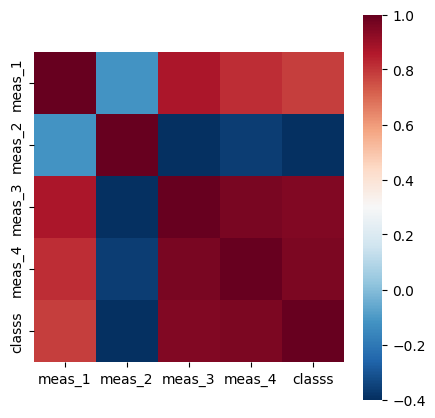

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(5, 5))
corr = df.corr()
sns.heatmap(corr,
    cmap=sns.color_palette('RdBu_r', 3, as_cmap=True),
    vmin=-0.4, vmax=1.0,
    square=True, ax=ax)

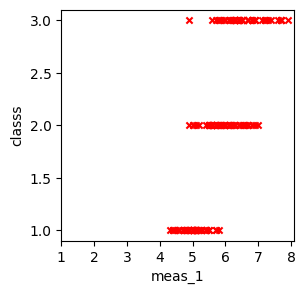

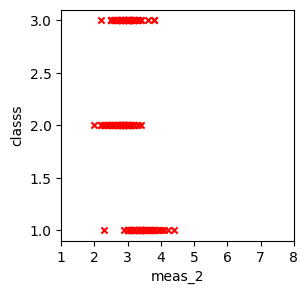

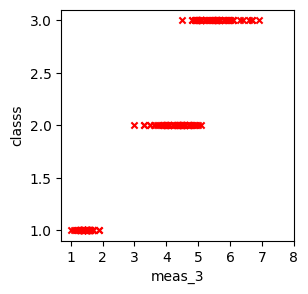

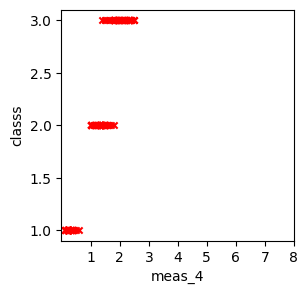

In [28]:

for fv in range(len(feature_names)-1):
    ax1 = df.plot.scatter(x=feature_names[fv],
                          y='classs',
                          figsize=(3,3),
                          marker='x',
                          color='r',
                          ).set_xticks(range(1, 9))
    # plt.show()